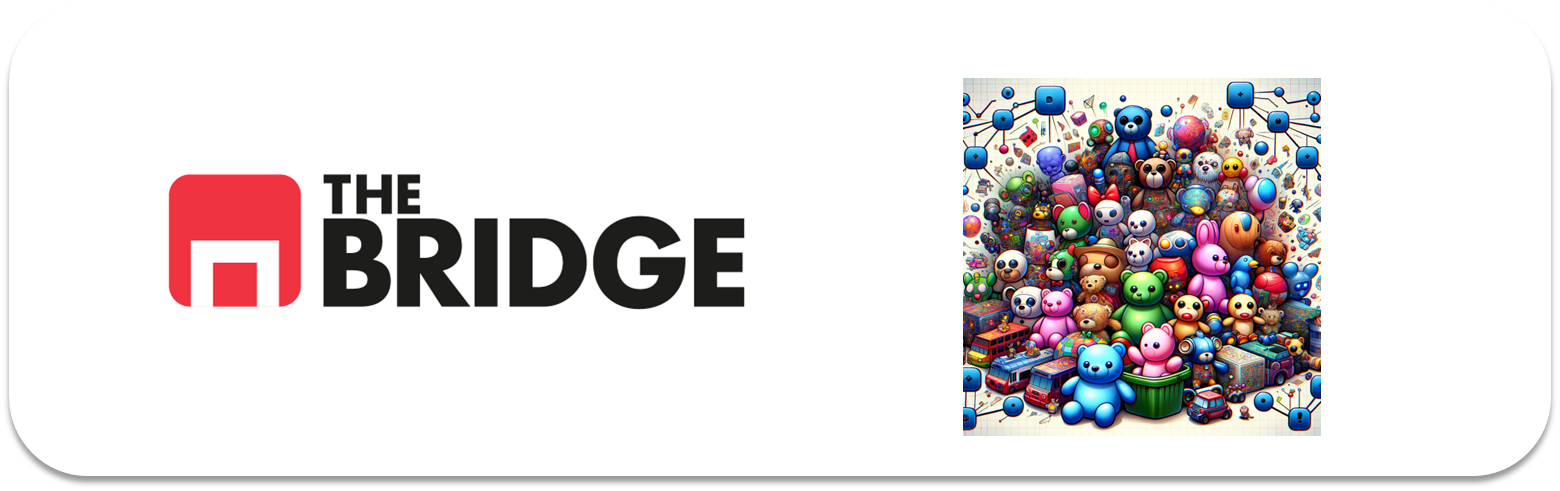

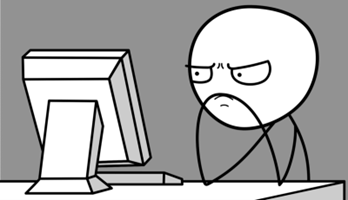

## PRACTICA OBLIGATORIA: DBSCAN y CLUSTERING JERARQUICO

* La práctica obligatoria de esta unidad consiste en un ejercicio de modelado no supervisado aplicado a clustering jerárquico y no jerárquico. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN, AgglomerativeClustering



### Parte I. Modelado

#### Descripción del problema.

En una planta de experimentación con nuevas bebidas energéticas están trabajando con diferentes mezclas de componentes para obtener posibles variedades de su producto estrella "NonstopU". El problema es que la fabricación de cada "prototipo" conlleva demasiado tiempo y las pruebas de sabores y de propiedades "non-stop" antisueño y antifatiga son costosas.  

En ese sentido quieren construir algún sistema de segmentación previa de mezclas sin probarlas solo indicando las cantidades de cada componente de la bebida. Tienen datos pero desgraciadamente de mezclas anteriores con diferentes medidas pero que por temas presupuestarios y de prioridad no se hicieron test con usuarios y potenciales clientes, es decir no tienen un target de capacidad antifatiga o de preferncia del usuario que puedas servirles para construir un clasificador clásico como han hecho otras veces.  

Han acudido a vosotros con la necesida de encontrar ese segmentador de posibles bebidas y con los datos de las mezclas no probadas anteriores por ver si vostros podéis ayudarles a encontrar algún tipo de segmentación que luego ello se encargarían de interpretar. No es requisito obligatorio pero les gustaría también poder establecer algún tipo de relación entre las segmentaciones (tipo cuales segmentos se "parecerían" más entre sí)

NOTA ORIENTATIVA: Los químicos no esperan que haya menos de 3 segmentos ni más de 5.  
NOTA OPERATIVA: El dataset con los datos que nos han dado los químicos está en "./data/empowering_drinks.csv"

**Se pide**: Construir al menos dos algoritmos de clustering (DBSCAN debe ser uno de ellos y el otro debería estar claro cual deberíamos usar dado el enunciado). Compararlos brevemente aunque sea meramente especulativo (¿Por qué es espculativo?)

**Se recomienda**: Visualizar las features dos a dos para escoger las mejores, no necesariamente hay que usar todas, ni tampoco quedarse en dos. Probar diferentes hiperparámetros en función de la nota orientativa y explicar porqué se han escogido los que finalmente se hayan escogido. 

Recuerda que el proceso es similar a lo que vimos en el otro tipo de aprendizaje:
1. Entender el problema
2. Cargar datos, visualizar.
3. MiniEDA: Selección de features
4. Tratamiento de Features.
5. Selección de modelos, selección de hiperparámetros
6. Entrenamiento, visualización de resultados.
7. Discusión de los mismos


In [89]:
# Importamos el dataset
df = pd.read_csv('/Users/lauragarcia/Projects/ONLINE_DS_THEBRIDGE_Curso2025/Bootcamp_Data_Science_2025/04_Machine_Learning /Sprint 13_ML_Modelos_No_Supervisados_I_Clustering/Unidad_02/Practica_Obligatoria/data/empowering_drinks.csv', sep= '|')

In [90]:
df.head()

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina
0,1.518613,0.232053,1.034819,1.013009,0.251717
1,0.246290,-0.827996,0.733629,0.965242,-0.293321
2,0.196879,1.109334,1.215533,1.395148,0.269020
3,1.691550,0.487926,1.466525,2.334574,1.186068
4,0.295700,1.840403,0.663351,-0.037874,-0.319276


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Azúcares               153 non-null    float64
 1   Vitamínas del grupo B  153 non-null    float64
 2   Cafeína                153 non-null    float64
 3   Ácido Cítrico          153 non-null    float64
 4   Taurina                153 non-null    float64
dtypes: float64(5)
memory usage: 6.1 KB


In [92]:
# Aparentemente es un dataframe con valores no nulos y son pocos datos en general

In [93]:
# empezamos el DBSCAN que no necesita ningún tipo de tratamiento de features
dbscan = DBSCAN( eps = 0.05, min_samples = 5) 

In [94]:
# El algoritmo
print(dbscan)

# Todos los datos etiquetados
print(len(dbscan.labels_))

# Los 10 primeros labels
print(dbscan.labels_[:10])

# Cuantos clusters ha montado
print(np.unique(dbscan.labels_))

DBSCAN(eps=0.05)


AttributeError: 'DBSCAN' object has no attribute 'labels_'

In [95]:
# Vamos a verlo gráficamente
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

AttributeError: 'DBSCAN' object has no attribute 'labels_'

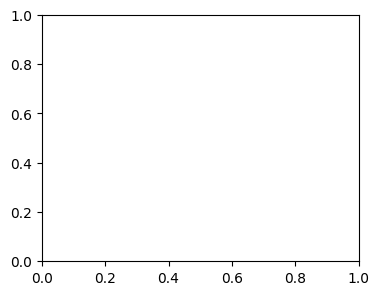

In [96]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, df, size=100)

plt.subplot(122)
plot_dbscan(dbscan, df, size=600, show_ylabels=False)


plt.show()

In [97]:
# me salen todos como anomalías. debe subir el eps
dbscan_2 = DBSCAN( eps = 1, min_samples = 5) 
dbscan_2.fit(df)

DBSCAN(eps=1)

In [98]:
# El algoritmo
print(dbscan_2)

# Todos los datos etiquetados
print(len(dbscan_2.labels_))

# Los 10 primeros labels
print(dbscan_2.labels_[:10])

# Cuantos clusters ha montado
print(np.unique(dbscan_2.labels_))

DBSCAN(eps=1)
153
[ 0  0  0 -1  0  0  0  0  0 -1]
[-1  0  1  2]


InvalidIndexError: (slice(None, None, None), 0)

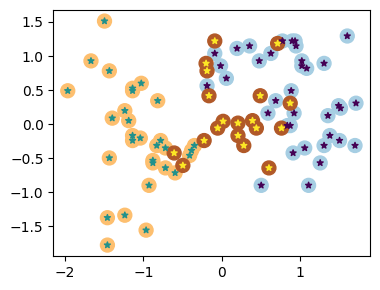

In [99]:
# Parece que ya tenemos 3 clusters, uno de ellos considerado anomalía, pero ..., lo voy a visualizar
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan_2, df, size=100)

plt.subplot(122)
plot_dbscan(dbscan_2, df, size=600, show_ylabels=False)


plt.show()

In [ ]:

dbscan_3 = DBSCAN( eps = 1, min_samples = 8) 
dbscan_3.fit(df)

DBSCAN(eps=1, min_samples=8)

In [ ]:
# El algoritmo
print(dbscan_3)

# Todos los datos etiquetados
print(len(dbscan_3.labels_))

# Los 10 primeros labels
print(dbscan_3.labels_[:10])

# Cuantos clusters ha montado
print(np.unique(dbscan_3.labels_))

DBSCAN(eps=1, min_samples=8)
153
[ 0  0  0 -1 -1  0  0  0  0 -1]
[-1  0  1  2]


InvalidIndexError: (slice(None, None, None), 0)

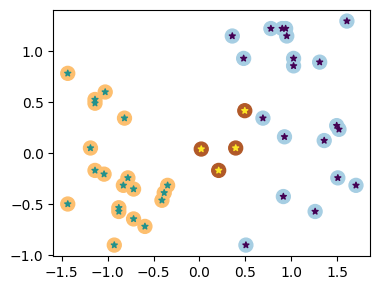

In [215]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan_3, df, size=100)

plt.subplot(122)
plot_dbscan(dbscan_3, df, size=600, show_ylabels=False)


plt.show()

In [ ]:
# Esta separaáción me gusta , son 3 cluster, aparentemente diferenciados. Me quedo con éste modelo ya que creo que es que mejor hace los cluster de las posibilidades que  probado.

In [ ]:
# Vamos con el clustering jerárquico
# Lo priemro es ver de nuevo las features
df.sample (10)

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina
1,0.246290,-0.827996,0.733629,0.965242,-0.293321
137,-0.186053,0.780354,-1.434939,-0.563315,0.225763
31,0.629222,1.036228,0.502717,1.108544,-0.371184
27,0.900980,1.218995,1.225573,1.713598,0.277671
128,-0.161348,0.414820,-1.384741,-0.388168,1.121183
81,-1.137207,-0.170035,-0.531369,-0.849920,-1.149810
131,-0.519575,-0.974210,-1.455019,-0.340401,1.099554
32,0.592164,0.158946,0.954502,0.551257,0.018129
109,-1.779545,3.156325,3.062832,-0.897687,0.407442
114,-0.778980,-0.243142,0.422399,-1.289380,-1.270929


In [ ]:
df.describe()

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina
count,153.000000,153.000000,153.000000,153.000000,153.000000
mean,0.019231,0.037273,0.041057,0.080022,-0.044088
std,1.026182,0.995984,1.040928,1.009450,0.934399
min,-2.434235,-3.679162,-1.695971,-1.493188,-1.634288
25%,-0.816038,-0.499016,-1.043392,-0.738463,-0.799428
50%,0.061000,-0.023821,0.211566,-0.165254,-0.154899
75%,0.876275,0.707247,0.894264,0.917474,0.493956
max,2.259772,3.156325,3.062832,2.971473,2.431870


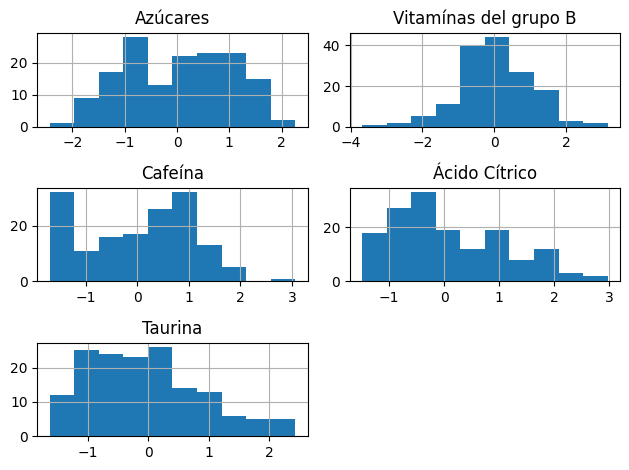

In [ ]:
# Aparentemente no haría falta escalarlos ya que los valores son similares y son todas las features numéricas
# Voy a ver si hay relación entre ellos
df.hist()
plt.tight_layout()

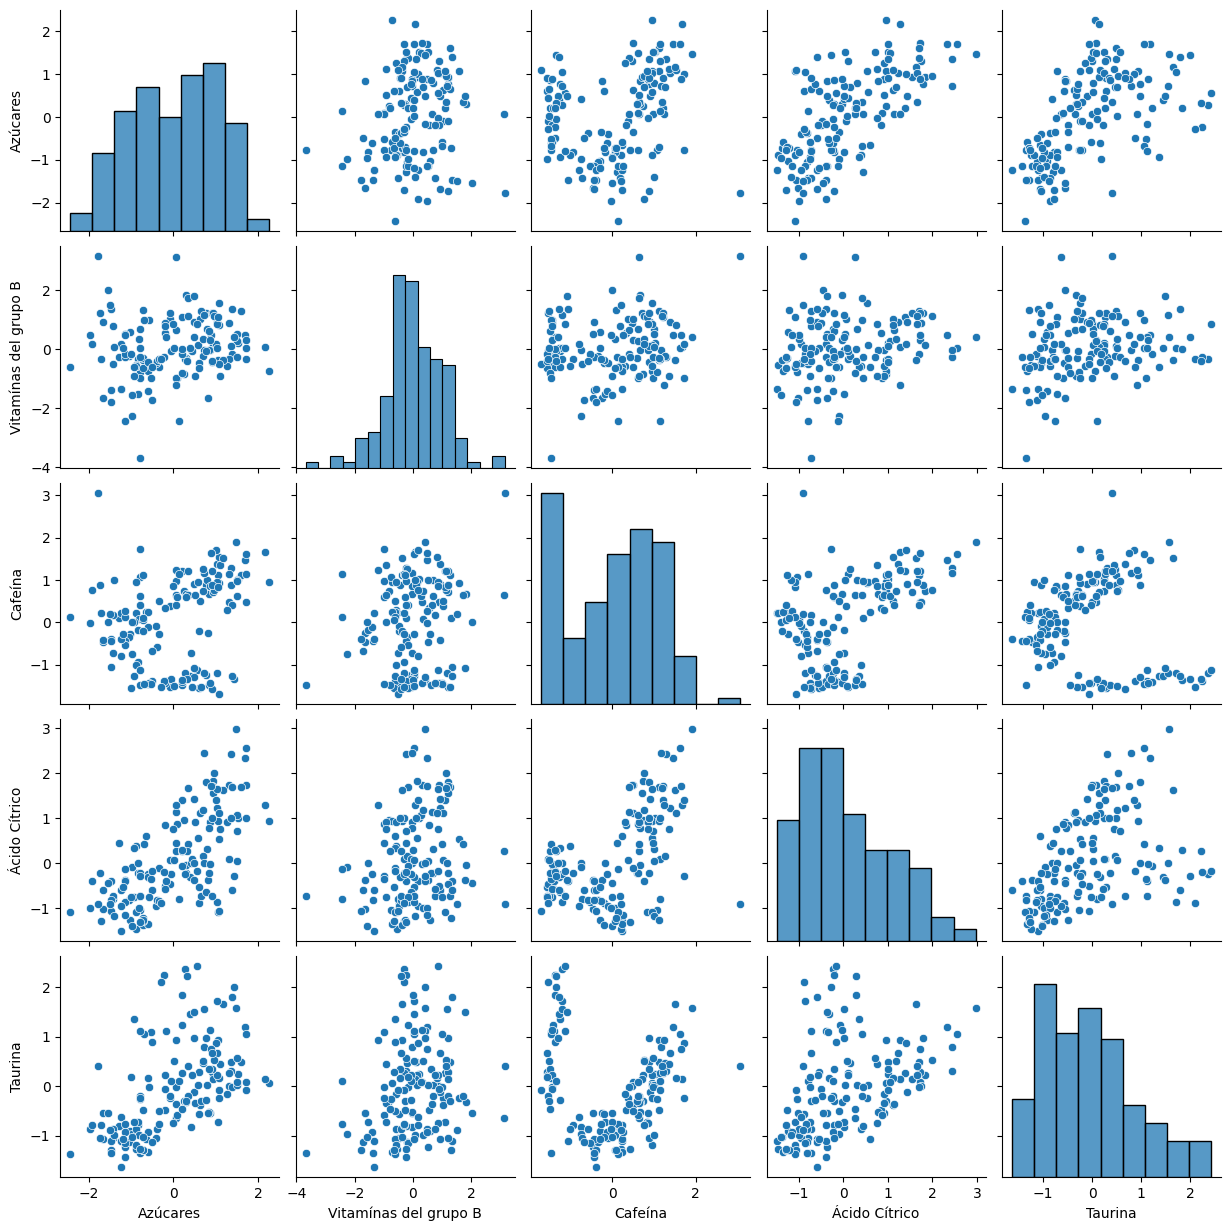

In [ ]:
sns.pairplot(df)

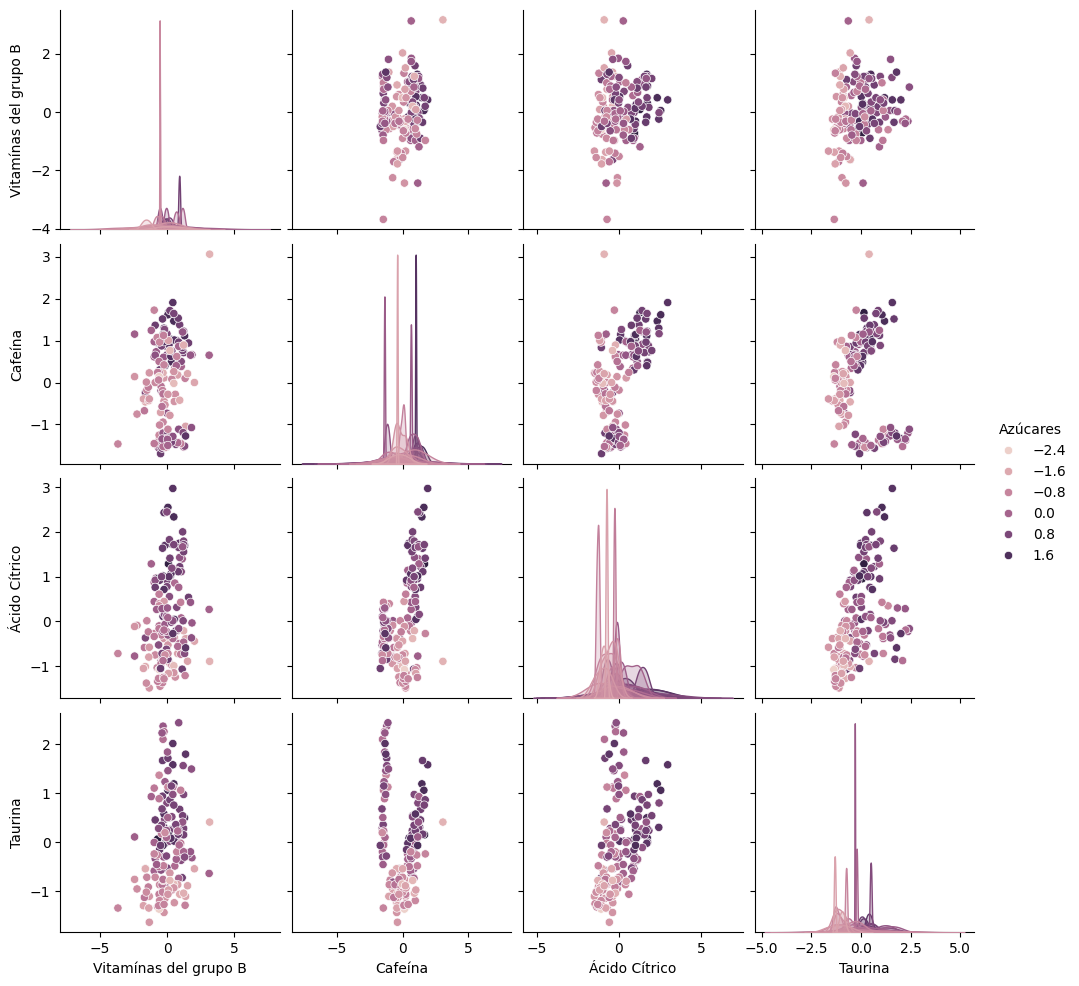

In [ ]:
# Aparentemente las únicas que pueden tener algo de relación son cafeína con taurina, en cierto modo tiene relación ya que son ambas excitantes. Y quizá cafeina con ácido cítrico.
# Voy a ver si hay relación con el azucar, que puede ser otro excitante.
sns.pairplot(df, hue = "Azúcares")

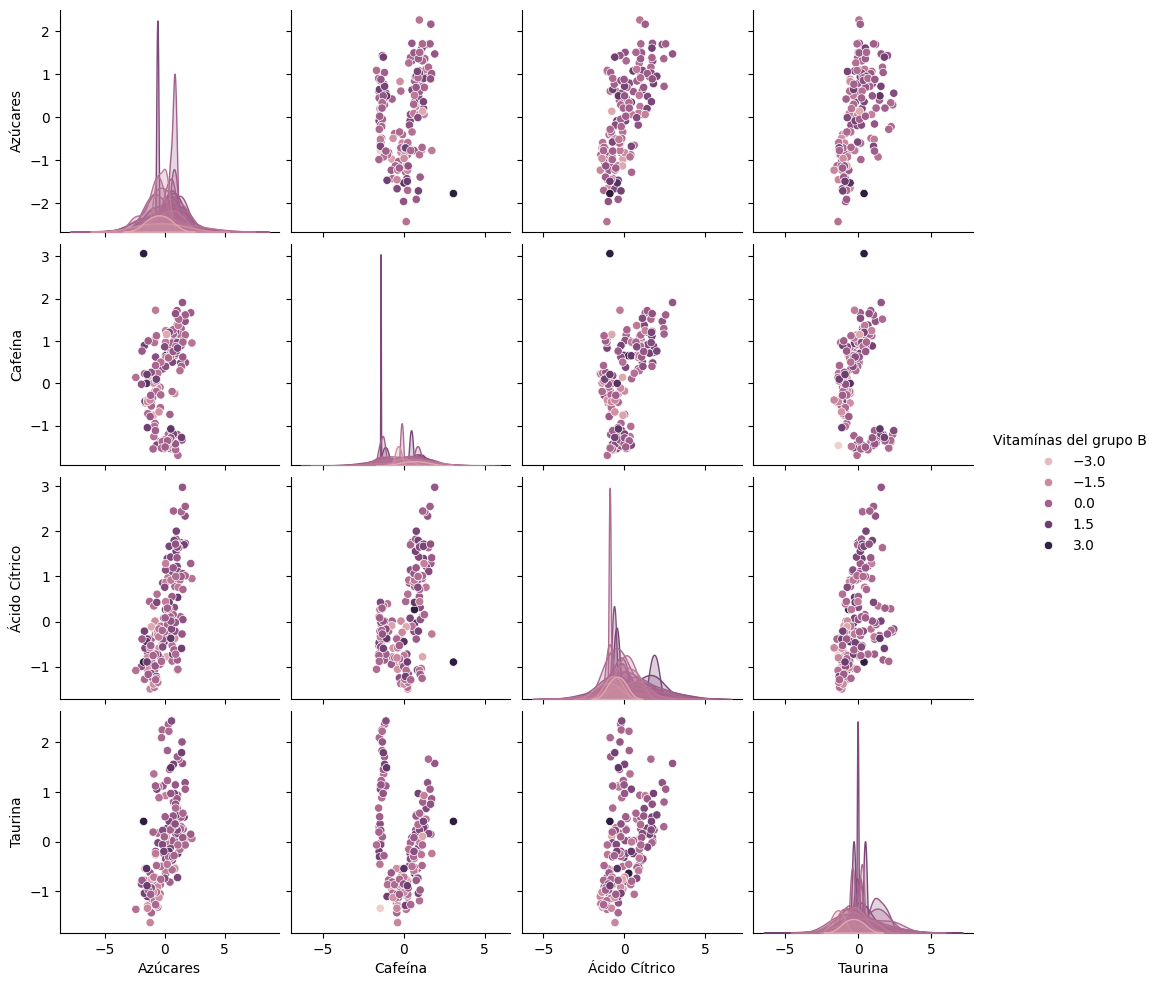

In [ ]:
# No me dice mucho, voy a probar con otra
sns.pairplot(df, hue = 'Vitamínas del grupo B')

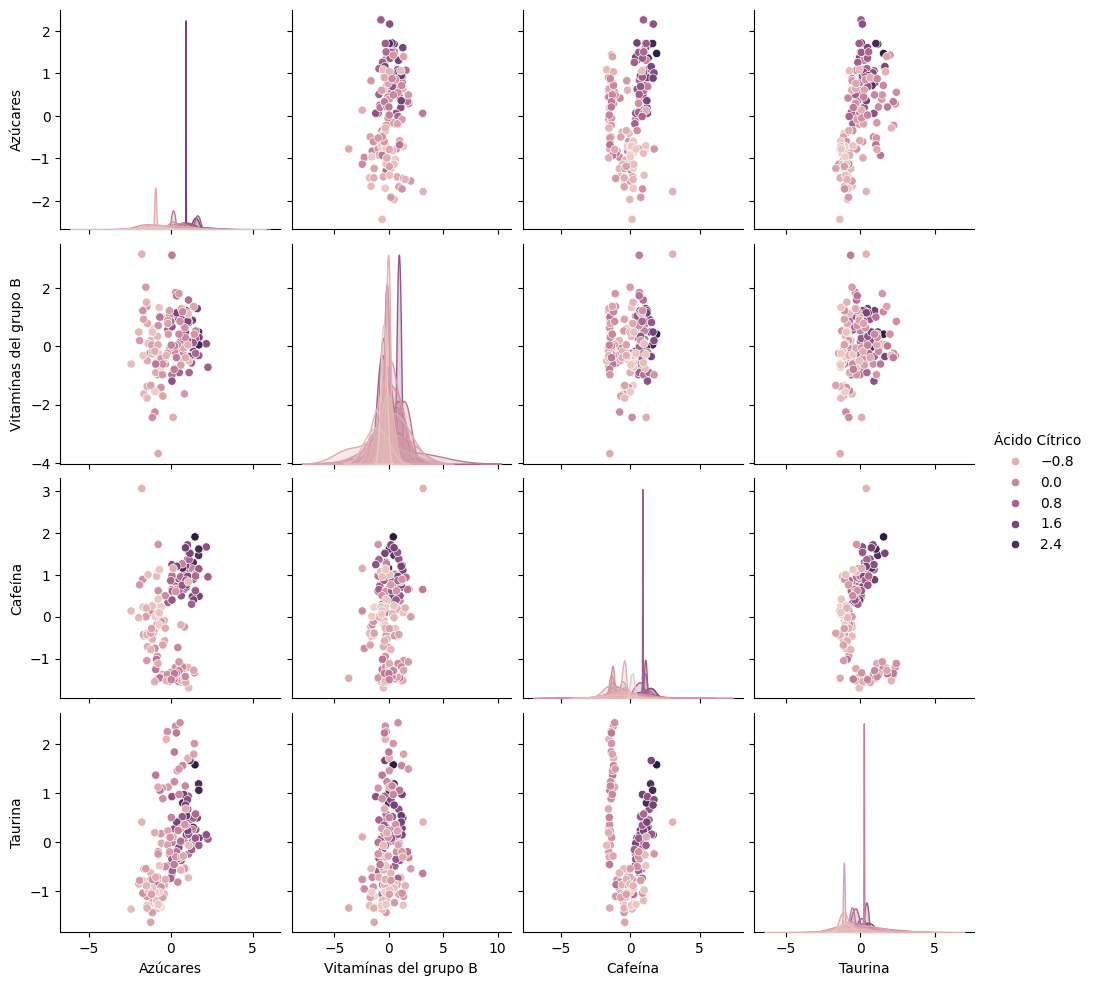

In [ ]:
sns.pairplot(df, hue = 'Ácido Cítrico')

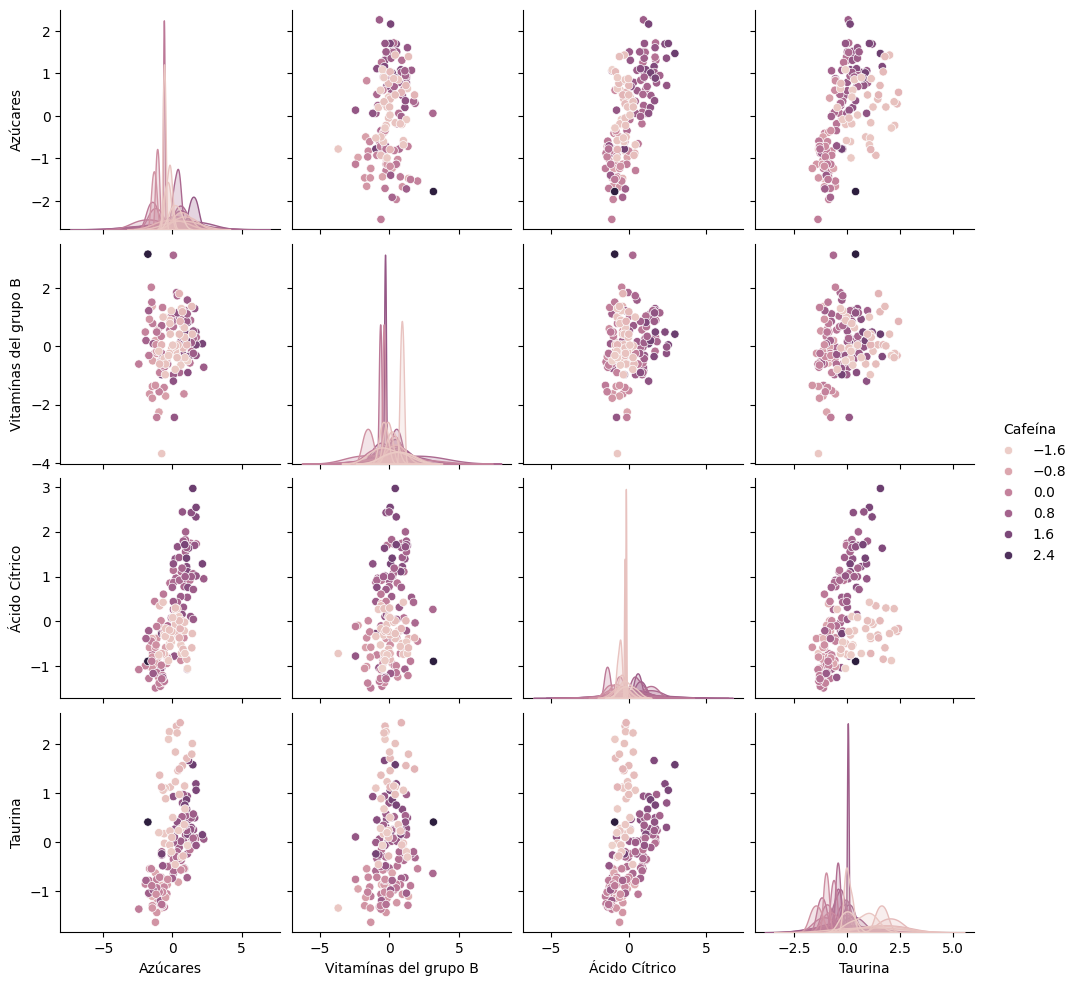

In [ ]:
sns.pairplot(df, hue = 'Cafeína')

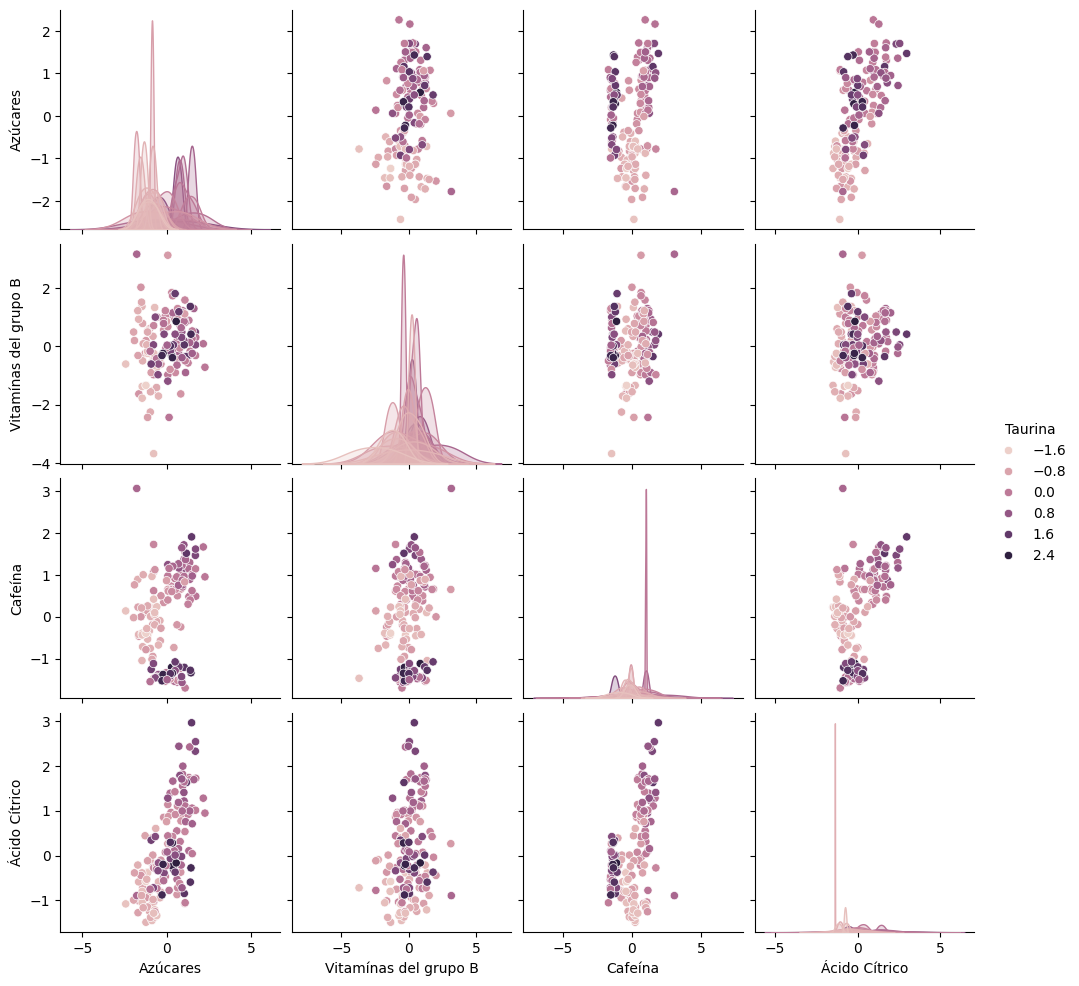

In [ ]:
sns.pairplot(df, hue = 'Taurina')

In [101]:
# No veo demasiadas relaciones. Como son pocas variables, me voy a quedar con todas y luego probaré a hacer sólo con cafeina y taurina
df.columns.to_list()

['Azúcares', 'Vitamínas del grupo B', 'Cafeína', 'Ácido Cítrico', 'Taurina']

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [45.0, 45.0, 55.0, 55.0],
  [22.5, 22.5, 50.0, 50.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [75.0, 75.0, 92.5, 92.5],
  [65.0, 65.0, 83.75, 83.75],
  [36.25, 36.25, 74.375, 74.375],
  [5.0, 5.0, 55.3125, 55.3125],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [115.0, 115.0, 132.5, 132.5],
  [155.0, 155.0, 165.0, 165.0],
  [123.75, 123.75, 160.0, 160.0],
  [175.0, 175.0, 185.0, 185.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [180.0, 180.0, 202.5, 202.5],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [285.0, 285.0, 295.0, 295.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [335.0, 335.0, 345.0, 345.0],
  [312.5, 312.5, 340.0, 340.0],
  [290.0, 290.0, 326.25, 326.25],
  [262.5, 262.5, 308.125, 308.125],
  [232.5, 232.5, 285.3125, 285.3125],
  [191.2

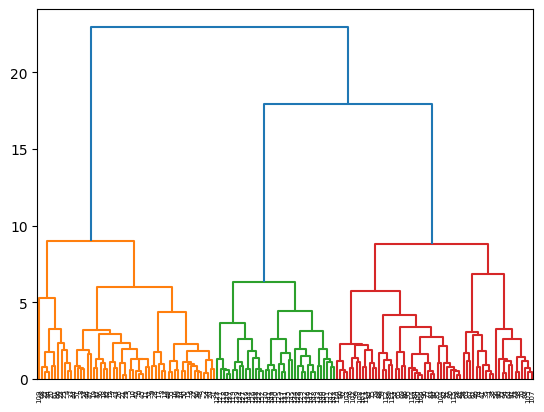

In [211]:
# Vamos a hacer el dendrograma
import scipy.cluster.hierarchy as sch
features_selected = df [['Azúcares', 'Vitamínas del grupo B', 'Cafeína', 'Ácido Cítrico', 'Taurina']]
clusters =sch.linkage(features_selected, method = 'ward', metric = 'euclidean')
sch.dendrogram( Z = clusters) 

In [212]:
from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering (n_clusters = 3, metric = 'euclidean', linkage = 'ward') # esocgemos 3 porque coincide con los k vistos en el pairplot y en el dendrograma

clustering_model.fit (features_selected)
clustering_model.labels_

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

<Axes: >

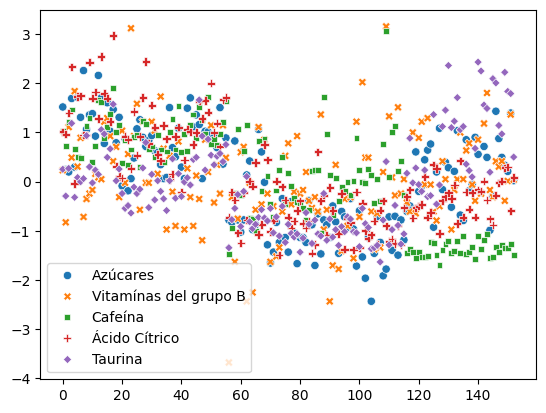

In [214]:
data_labels = clustering_model.labels_
sns.scatterplot (data= features_selected)

In [ ]:
# Ambos métios me dan la división en 3 cluster

### Parte II. Nuevos experimentos

Los químicos están muy esperanzados con los modelos que les habéis mostrado y os pasan una lista de nuevos experimentos para que los clasifiquéis. Emplea uno de los modelos construidos, el que te resulte más sencillo, para segmentar los nuevos experimentos que puedes encontrar en "./data/new_experiments.csv"

In [216]:
# Voy a implementar  DBSCAN porque me parece menos tedioso
# Importamos el dataset
df_experiment = pd.read_csv('/Users/lauragarcia/Projects/ONLINE_DS_THEBRIDGE_Curso2025/Bootcamp_Data_Science_2025/04_Machine_Learning /Sprint 13_ML_Modelos_No_Supervisados_I_Clustering/Unidad_02/Practica_Obligatoria/data/new_experiments.csv', sep= '|')

In [219]:
df_experiment.head(10)

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina
0,1.481555,0.305159,1.366128,2.239039,0.731870
1,0.616869,0.890014,0.583034,0.312420,-0.665332
2,-1.680724,0.341713,-0.340615,-0.213021,-0.976782
3,-0.284874,-1.412851,-0.782361,-1.193845,-0.717240
4,-0.927212,0.634140,-1.565455,-0.085641,-0.522583
5,0.962743,-0.243142,-1.354622,-0.420013,1.956043


In [218]:
df_experiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Azúcares               6 non-null      float64
 1   Vitamínas del grupo B  6 non-null      float64
 2   Cafeína                6 non-null      float64
 3   Ácido Cítrico          6 non-null      float64
 4   Taurina                6 non-null      float64
dtypes: float64(5)
memory usage: 372.0 bytes


In [220]:
# me copio el modelo con el que me he quedado 
dbscan_3 = DBSCAN( eps = 1, min_samples = 8) 
dbscan_3.fit(df)

DBSCAN(eps=1, min_samples=8)

In [223]:
# Hacemos un KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=44)
knn.fit(dbscan_3.components_, dbscan_3.labels_[dbscan_3.core_sample_indices_]) # Pongo los datos de mi modelo escogido


KNeighborsClassifier(n_neighbors=44)

In [224]:
# Ahora le pasamos los datos de los nuevos experimentos
knn.predict(df_experiment)

/Users/lauragarcia/.local/share/virtualenvs/lauragarcia-3NpKiQeF/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array([0, 0, 0, 0, 0, 0])

In [ ]:
# Me clasifica todos los nuevos experimentos en el cluster 0

### Parte III. EXTRA (Voluntario): 6 meses después...

La unidad de experimentación recibió un presupuesto adicional gracias a los modelos que les proporcionastes e hizo pruebas con cliente y obtuvo resultados como para clasificar cada bebida en terminos de "energización" en tres niveles (1, media; 2, media-alta, 3, alta). El resultado de los mismos está en el fichero adecuado en el directorio data y alineado con los experimentos iniciales y al final con los nuevos experimentos de la parte anterior.

Evalua la segmentación de los modelos creados en la primera parte.